In [270]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objs as go

In [271]:
deliveries_data = pd.read_csv('IPL Ball-by-Ball 2008-2020.csv')
match_data = pd.read_csv('IPL Matches 2008-2020.csv')

In [272]:
match_data.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [273]:
print(match_data['winner'].unique())

['Kolkata Knight Riders' 'Chennai Super Kings' 'Delhi Daredevils'
 'Royal Challengers Bangalore' 'Rajasthan Royals' 'Kings XI Punjab'
 'Deccan Chargers' 'Mumbai Indians' 'Pune Warriors' 'Kochi Tuskers Kerala'
 nan 'Sunrisers Hyderabad' 'Rising Pune Supergiants' 'Gujarat Lions'
 'Rising Pune Supergiant' 'Delhi Capitals']


In [274]:
match_data.isnull().sum()

id                   0
city                13
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
dtype: int64

In [275]:
match_data = match_data.drop(['method'],axis=1)
match_data.isnull().sum()

id                  0
city               13
date                0
player_of_match     4
venue               0
neutral_venue       0
team1               0
team2               0
toss_winner         0
toss_decision       0
winner              4
result              4
result_margin      17
eliminator          4
umpire1             0
umpire2             0
dtype: int64

In [276]:
match_data = match_data.dropna(axis=0)
match_data.isnull().sum()

id                 0
city               0
date               0
player_of_match    0
venue              0
neutral_venue      0
team1              0
team2              0
toss_winner        0
toss_decision      0
winner             0
result             0
result_margin      0
eliminator         0
umpire1            0
umpire2            0
dtype: int64

In [277]:
deliveries_data.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [278]:
match_data.shape

(786, 16)

In [279]:
deliveries_data.shape

(193468, 18)

In [280]:
match_data.columns

Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'umpire1', 'umpire2'],
      dtype='object')

In [281]:
print('Total Matches Played:',match_data.shape[0])
print(' \n place Played At:',match_data['city'].unique())     
print(' \n Teams :',match_data['team1'].unique())

Total Matches Played: 786
 
 place Played At: ['Bangalore' 'Chandigarh' 'Delhi' 'Mumbai' 'Kolkata' 'Jaipur' 'Hyderabad'
 'Chennai' 'Cape Town' 'Port Elizabeth' 'Durban' 'Centurion' 'East London'
 'Johannesburg' 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur'
 'Dharamsala' 'Kochi' 'Indore' 'Visakhapatnam' 'Pune' 'Raipur' 'Ranchi'
 'Abu Dhabi' 'Rajkot' 'Kanpur' 'Bengaluru' 'Sharjah' 'Dubai']
 
 Teams : ['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Daredevils'
 'Mumbai Indians' 'Kolkata Knight Riders' 'Rajasthan Royals'
 'Deccan Chargers' 'Chennai Super Kings' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Sunrisers Hyderabad' 'Gujarat Lions'
 'Rising Pune Supergiants' 'Rising Pune Supergiant' 'Delhi Capitals']


In [282]:
teams = [
    'Sunrisers Hyderabad',
    'Mumbai Indians',
    'Royal Challengers Bangalore',
    'Kolkata Knight Riders',
    'Kings XI Punjab',
    'Chennai Super Kings',
    'Rajasthan Royals',
    'Delhi Capitals'
]

In [283]:
match_data['team1'] = match_data['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_data['team2'] = match_data['team2'].str.replace('Delhi Daredevils','Delhi Capitals')

match_data['toss_winner'] = match_data['toss_winner'].str.replace('Delhi Daredevils','Delhi Capitals')
match_data['winner'] = match_data['winner'].str.replace('Delhi Daredevils','Delhi Capitals')

In [284]:
match_data['team1'] = match_data['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_data['team2'] = match_data['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

match_data['toss_winner'] = match_data['toss_winner'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_data['winner'] = match_data['winner'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

In [285]:
match_data = match_data[match_data['team1'].isin(teams)]
match_data = match_data[match_data['team2'].isin(teams)]

match_data = match_data[match_data['toss_winner'].isin(teams)]
match_data = match_data[match_data['winner'].isin(teams)]

In [286]:
match_data.shape

(673, 16)

In [287]:
match_data.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Capitals,wickets,9.0,N,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,5.0,N,BF Bowden,K Hariharan


In [288]:
most_toss_wins_df = match_data['toss_winner'].value_counts()
most_toss_wins_df = pd.DataFrame(most_toss_wins_df)
most_toss_wins_df

,toss_winner
Chennai Super Kings,93
Mumbai Indians,91
Delhi Capitals,90
Kolkata Knight Riders,86
Sunrisers Hyderabad,85
Rajasthan Royals,79
Royal Challengers Bangalore,75
Kings XI Punjab,74


Text(0.5, 1.0, 'Number of toss winning team ')

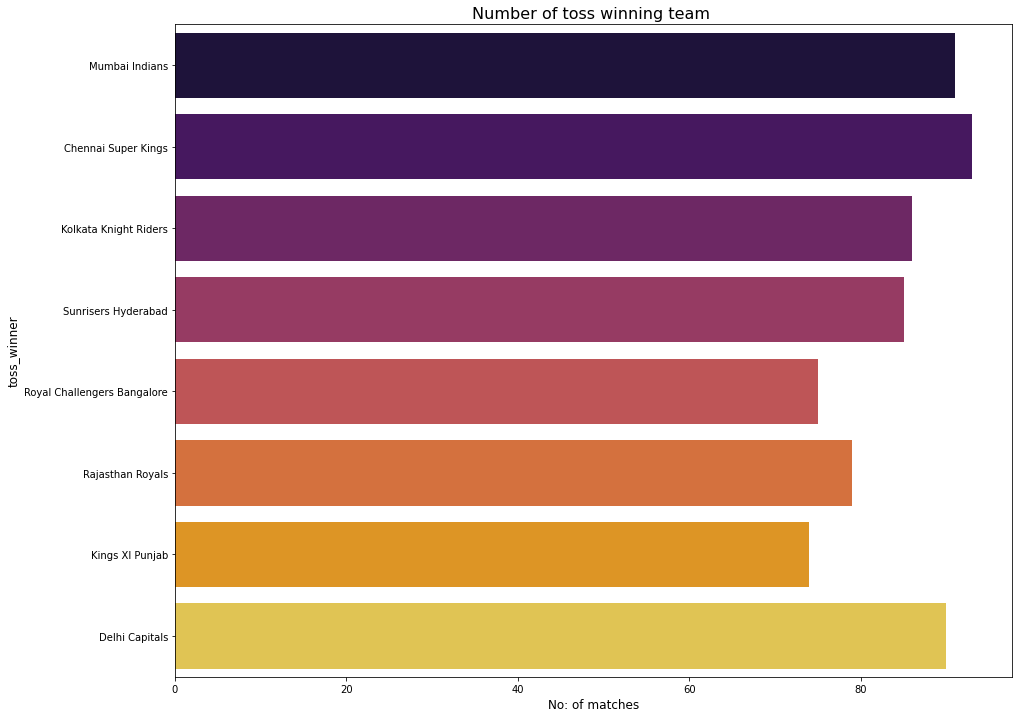

In [290]:
plt.figure(figsize=(15,12))
sns.countplot(y = 'toss_winner',
              data = match_data,
              order= match_data['winner'].value_counts().index,
              palette = 'inferno' )
plt.ylabel('toss_winner',fontsize=12)
plt.xlabel('No: of matches',fontsize=12)
plt.title('Number of toss winning team ',fontsize=16)

In [291]:
matches_played_byteams=pd.concat([match_data['team1'],match_data['team2']],axis=1)
teams=(matches_played_byteams['team1'].value_counts()+matches_played_byteams['team2'].value_counts()).reset_index()
teams.columns=['Team Name','Total Matches played']
teams.sort_values(by=['Total Matches played'],ascending=False).reset_index().drop('index',axis=1).style.background_gradient(cmap='PuBu')

,Team Name,Total Matches played
0,Mumbai Indians,179
1,Sunrisers Hyderabad,176
2,Kolkata Knight Riders,171
3,Delhi Capitals,170
4,Royal Challengers Bangalore,169
5,Kings XI Punjab,168
6,Chennai Super Kings,166
7,Rajasthan Royals,147


In [292]:
wins=pd.DataFrame(match_data['winner'].value_counts()).reset_index()
wins.columns=['Team Name','Wins']
wins.style.background_gradient(cmap='PuBu')

,Team Name,Wins
0,Mumbai Indians,110
1,Chennai Super Kings,98
2,Kolkata Knight Riders,89
3,Sunrisers Hyderabad,80
4,Royal Challengers Bangalore,75
5,Rajasthan Royals,74
6,Kings XI Punjab,74
7,Delhi Capitals,73


In [293]:
played=teams.merge(wins,left_on='Team Name',right_on='Team Name',how='inner')
played['% Win']=(played['Wins']/played['Total Matches played'])*100
played.sort_values(by=['% Win'],ascending=False).reset_index().drop('index',axis=1).style.background_gradient(cmap='PuBu',subset=['% Win'])

,Team Name,Total Matches played,Wins,% Win
0,Mumbai Indians,179,110,61.452514
1,Chennai Super Kings,166,98,59.036145
2,Kolkata Knight Riders,171,89,52.046784
3,Rajasthan Royals,147,74,50.340136
4,Sunrisers Hyderabad,176,80,45.454545
5,Royal Challengers Bangalore,169,75,44.378698
6,Kings XI Punjab,168,74,44.047619
7,Delhi Capitals,170,73,42.941176


In [294]:
colors = ['turquoise',] * 15
colors[8] = 'crimson'
fig=px.bar(x=played['Team Name'],y=played['Total Matches played'],labels=dict(x="Team Name",y="Count"),)
fig.update_layout(title="Total number of matches played",
                  titlefont={'size': 26},template='simple_white'     
                  )
fig.update_traces(marker_line_color='black',
                  marker_line_width=2.5, opacity=1,marker_color=colors)
fig.show()

In [295]:
colors = ['turquoise',] * 15
colors[8] = 'crimson'
fig=px.bar(x=played['Team Name'],y=played['Wins'],labels=dict(x="Team Name",y="Count"),)
fig.update_layout(title="Total Win by teams",
                  titlefont={'size': 26},template='simple_white'     
                  )
fig.update_traces(marker_line_color='black',
                  marker_line_width=2.5, opacity=1,marker_color=colors)
fig.show()

In [296]:
colors = ['turquoise',] * 15
colors[-4] = 'crimson'
fig=px.bar(x=played['Team Name'],y=played['% Win'],labels=dict(x="Team Name",y="Count"),)
fig.update_layout(title="Win % by teams",
                  titlefont={'size': 26},template='simple_white'     
                  )
fig.update_traces(marker_line_color='black',
                  marker_line_width=2.5, opacity=1,marker_color=colors)
fig.show()

In [297]:
match_data['toss_win_game_win'] = np.where((match_data.toss_winner == match_data.winner),'Yes','No')
match_data.head(10)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,umpire1,umpire2,toss_win_game_win
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,Asad Rauf,RE Koertzen,No
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,MR Benson,SL Shastri,Yes
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Capitals,wickets,9.0,N,Aleem Dar,GA Pratapkumar,No
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,SJ Davis,DJ Harper,No
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,5.0,N,BF Bowden,K Hariharan,No
5,335987,Jaipur,2008-04-21,SR Watson,Sawai Mansingh Stadium,0,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,bat,Rajasthan Royals,wickets,6.0,N,Aleem Dar,RB Tiffin,No
6,335988,Hyderabad,2008-04-22,V Sehwag,"Rajiv Gandhi International Stadium, Uppal",0,Sunrisers Hyderabad,Delhi Capitals,Sunrisers Hyderabad,bat,Delhi Capitals,wickets,9.0,N,IL Howell,AM Saheba,No
7,335989,Chennai,2008-04-23,ML Hayden,"MA Chidambaram Stadium, Chepauk",0,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,Chennai Super Kings,runs,6.0,N,DJ Harper,GA Pratapkumar,No
8,335990,Hyderabad,2008-04-24,YK Pathan,"Rajiv Gandhi International Stadium, Uppal",0,Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,3.0,N,Asad Rauf,MR Benson,Yes
9,335991,Chandigarh,2008-04-25,KC Sangakkara,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,Kings XI Punjab,runs,66.0,N,Aleem Dar,AM Saheba,No


In [298]:
g_wins=pd.DataFrame(match_data['toss_win_game_win'].value_counts()).reset_index()
g_wins.columns=['Team Name','Wins']
g_wins.style.background_gradient(cmap='PuBu')

,Team Name,Wins
0,Yes,344
1,No,329


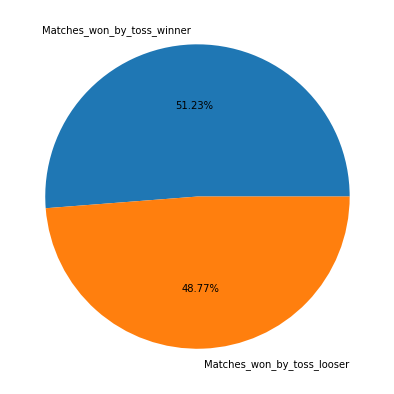

In [299]:
toss_data = { "Matches_won_by_toss_winner" : 418,
              "Matches_won_by_toss_looser" : 398}
toss_data = pd.Series(toss_data)
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(7,7))
plt.pie(x=toss_data,autopct="%.2f%%",labels=toss_data.index);

In [300]:
labels =["Yes",'No']
values = match_data['toss_win_game_win'].value_counts()
colors = ['turquoise', 'crimson']
fig = go.Figure(data=[go.Pie(labels=labels,
                             values=values,hole=.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='label+percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=3)))
fig.update_layout(title="Winning toss implies winning macthes?",
                  titlefont={'size': 30},
                  )
fig.show()

In [308]:
from plotly.offline import init_notebook_mode, plot, iplot
from plotly import tools
trace1 = go.Bar(x=match_data["winner"].value_counts().index, y=match_data["winner"].value_counts().values,name="match win")
trace2 = go.Bar(x=match_data["toss_winner"].value_counts().index, y=match_data["toss_winner"].value_counts().values,name="toss win")

# Fill out  data with our traces
data = [trace1, trace2]
# Create layout and specify title, legend and so on


layout = go.Layout(title="Toss win vs Match win",
                   xaxis=dict(title="Teams"),
                   yaxis=dict(title="Number of Matches"),
                   legend=dict(x=1.0, y=0.5)
                   ,barmode="group")


# Create figure with all prepared data for plot
fig = go.Figure(data=data, layout=layout)
# Create a plot in your Python script directory with name "bar-chart.html"
iplot(fig)

In [305]:
# Lets calculate the winning probability of each team

def winning_probability(team):
    
    '''
    Note: Here, I am considering the winning probability as the ratio of number of matches won by a team to the number of matches played.
    '''
    
    # Extract the data for the given team
    team_data = match_data[(match_data['team1'] == team) | (match_data['team2'] == team)]

    # Calculate the total number of matches played, won and lost
    total_matches_played = team_data.shape[0]
    total_matches_won = team_data[team_data['winner'] == team].shape[0]
    total_matches_lost = team_data[team_data['winner'] != team].shape[0]

    # Calculate the winning and losing probability
    
    '''
    Here, the winning and losing probabilities is taken as follows:
    
    Winning Probability = Total Matches Won/ Total Matches Playes
    Losing Probability = Total Matches Lost/ Total Matches Played 
    '''
    winning_probability = total_matches_won/total_matches_played
    losing_probability = total_matches_lost/total_matches_played
     
    # Print the results for the given team
    print("Winning Probability for {} is {:.3f}".format(team, winning_probability))
    print("Losing Probability for {} is {:.3f}".format(team, losing_probability))

    print()
    return winning_probability, losing_probability

In [306]:
# Function to compute the Probability Mass Function of a Binomila Distribution

def compute_binomial_probability(x, n, p):
    
    '''
    x = Number of events
    n = Total number of trials
    p = Winning probability(success)
    '''
    
    PMF = (math.factorial(n)*math.pow(p, x)*math.pow((1-p), (n-x)))/(math.factorial(x)*math.factorial(n-x))
    return PMF

# Function to plot the Binomial Distribution
def plot_binomial_distribution(team, n, p):
    
    '''
    n = Total Number of Trials
    p = Success Probability
    '''
    
    probabilities = list(map(lambda x: compute_binomial_probability(x, n, p), range(0, n+1)))
    max_probability = max(probabilities)
    max_matches_won = probabilities.index(max_probability) + 1
    plt.style.use('seaborn')
    plt.bar(list(range(0, n+1)), probabilities)
    plt.xticks(np.arange(1, n+1, 2))
    plt.title(team)
    plt.xlabel("Number of Matches")
    plt.ylabel("Probability")
    
    return max_matches_won

In [307]:
# Calculate the Winning and Losing Probability Distribution for each team and plot the binomial distributions for 50 Matches

IPL_teams = match_data['team1'].unique().tolist()

# Dictionary to store the winning and losing probabilities for a given team
winning_probability_map = {}
losing_probability_map = {}

for team in IPL_teams:
    team_win_prob, team_lose_prob = winning_probability(team)
    winning_probability_map[team] = team_win_prob
    losing_probability_map[team] = team_lose_prob

Winning Probability for Royal Challengers Bangalore is 0.444
Losing Probability for Royal Challengers Bangalore is 0.556

Winning Probability for Kings XI Punjab is 0.440
Losing Probability for Kings XI Punjab is 0.560

Winning Probability for Delhi Capitals is 0.429
Losing Probability for Delhi Capitals is 0.571

Winning Probability for Mumbai Indians is 0.615
Losing Probability for Mumbai Indians is 0.385

Winning Probability for Kolkata Knight Riders is 0.520
Losing Probability for Kolkata Knight Riders is 0.480

Winning Probability for Rajasthan Royals is 0.503
Losing Probability for Rajasthan Royals is 0.497

Winning Probability for Sunrisers Hyderabad is 0.455
Losing Probability for Sunrisers Hyderabad is 0.545

Winning Probability for Chennai Super Kings is 0.590
Losing Probability for Chennai Super Kings is 0.410

